## 📦 Model Popularity: How Open Models Drive AI Experimentation on Kaggle

### Exploring Model Popularity Over Time and Type
Kaggle’s models dataset showcases how different AI models capture community interest through downloads, views, votes, and kernels. By analyzing these trends, we gain insights into which types of models (BERT, ResNet, YOLOv8, etc.) inspire the most experimentation and adoption among practitioners.

---

### We Explore:
- Popularity of model types based on views, downloads, votes, and kernels.
- Emerging trends in model usage (e.g., LLMs, vision models, fine-tuning frameworks).
- Impact of open models on the Kaggle ecosystem.

---

### 📂 Data Sources:
- `Models.csv`: Model metadata (views, downloads, votes, kernels, slugs)
- `ModelVersions.csv`: Model names and details
- `ModelVariations.csv`: Framework, license details
- `ModelVariationVersions.csv`: Fine-tuning information, organizations

---

### ❓ Key Questions:
- Which types of models (`CurrentSlug`) drive the most downloads, views, votes, and kernels?
- Are certain model families (e.g., BERT, YOLO) consistently popular?
- How does popularity differ across frameworks (TensorFlow, PyTorch)?
- What licenses (Apache, MIT) dominate in top-used models?
- Are fine-tunable models downloaded more than static ones?

---

### 📊 Visualizations:
- **Bar Charts:**
  - Top 10 `CurrentSlug` models by downloads, views, votes, kernels.
- **Stacked Bar Charts:**
  - Compare votes, views, downloads per model slug side-by-side.
- **Line Charts:**
  - If time-based analysis is possible (using `CreationDate`), show downloads/views growth over time.
- **Pie Charts:**
  - Share of models by framework (TensorFlow, PyTorch).
  - Share of models by license type.
- **Bar Chart (Fine-Tunable vs. Non-Fine-Tunable):**
  - How does fine-tunability relate to popularity?

---

### ✨ Potential Insights:
- Identify which AI techniques (LLMs, CV, tabular) are most embraced.
- Show how framework preferences align with community adoption.
- Expose whether fine-tuning drives more practical interest.
- Uncover the role of open licensing in model reuse.
- Provide evidence of trends shifting from classic ML to GenAI.

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kaggle/meta-kaggle")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/meta-kaggle


In [4]:
!pip install circlify

In [1]:
import pandas as pd
# Load datasets
model_versions = pd.read_csv('/kaggle/input/meta-kaggle/ModelVersions.csv')
models = pd.read_csv('/kaggle/input/meta-kaggle/Models.csv')
model_tags = pd.read_csv('/kaggle/input/meta-kaggle/ModelTags.csv')
model_variation_versions = pd.read_csv('/kaggle/input/meta-kaggle/ModelVariationVersions.csv')
model_variations = pd.read_csv('/kaggle/input/meta-kaggle/ModelVariations.csv')
model_votes = pd.read_csv('/kaggle/input/meta-kaggle/ModelVotes.csv')


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named `models`
# Filter the columns of interest
columns_of_interest = ['CurrentSlug', 'TotalViews', 'TotalDownloads', 'TotalVotes', 'TotalKernels']
models_subset = models[columns_of_interest].copy()

# Group by CurrentSlug and aggregate sums
# Group by CurrentSlug and aggregate
slug_summary = models.groupby('CurrentSlug').agg({
    'TotalViews': 'sum',
    'TotalDownloads': 'sum',
    'TotalVotes': 'sum',
    'TotalKernels': 'sum',
    'CreationDate': 'min'  # Get the first (earliest) creation date
}).reset_index()

# Rename for clarity
slug_summary = slug_summary.rename(columns={'CreationDate': 'FirstCreationDate'})

# Sort by TotalDownloads to find the most downloaded models
slug_summary = slug_summary.sort_values(by='TotalDownloads', ascending=False)

# Select top 40 slugs by downloads
top40_df = slug_summary.head(40).copy()

In [9]:
top40_df.head()

,CurrentSlug,TotalViews,TotalDownloads,TotalVotes,TotalKernels,FirstCreationDate,NormDownloads
2326,blazeface,17974,443913595,74,3,02/15/2023 19:35:34,10.000000
6292,face-detection,9876,154565449,46,4,01/12/2023 03:08:56,3.481881
6342,facemesh,9387,85372001,58,3,02/15/2023 19:23:11,1.923167
8999,iris,5062,43154355,28,0,01/03/2025 08:33:55,0.972134
17742,universal-sentence-encoder,136371,41988914,210,54,01/12/2023 02:46:05,0.945880


unexpected key 'downloads' in input is ignored
unexpected key 'downloads' in input is ignored
unexpected key 'downloads' in input is ignored
unexpected key 'downloads' in input is ignored
unexpected key 'downloads' in input is ignored
unexpected key 'downloads' in input is ignored
unexpected key 'downloads' in input is ignored
unexpected key 'downloads' in input is ignored
unexpected key 'downloads' in input is ignored
unexpected key 'downloads' in input is ignored
unexpected key 'downloads' in input is ignored
unexpected key 'downloads' in input is ignored
unexpected key 'downloads' in input is ignored
unexpected key 'downloads' in input is ignored
unexpected key 'downloads' in input is ignored
unexpected key 'downloads' in input is ignored
unexpected key 'downloads' in input is ignored
unexpected key 'downloads' in input is ignored
unexpected key 'downloads' in input is ignored
unexpected key 'downloads' in input is ignored
unexpected key 'downloads' in input is ignored
unexpected ke

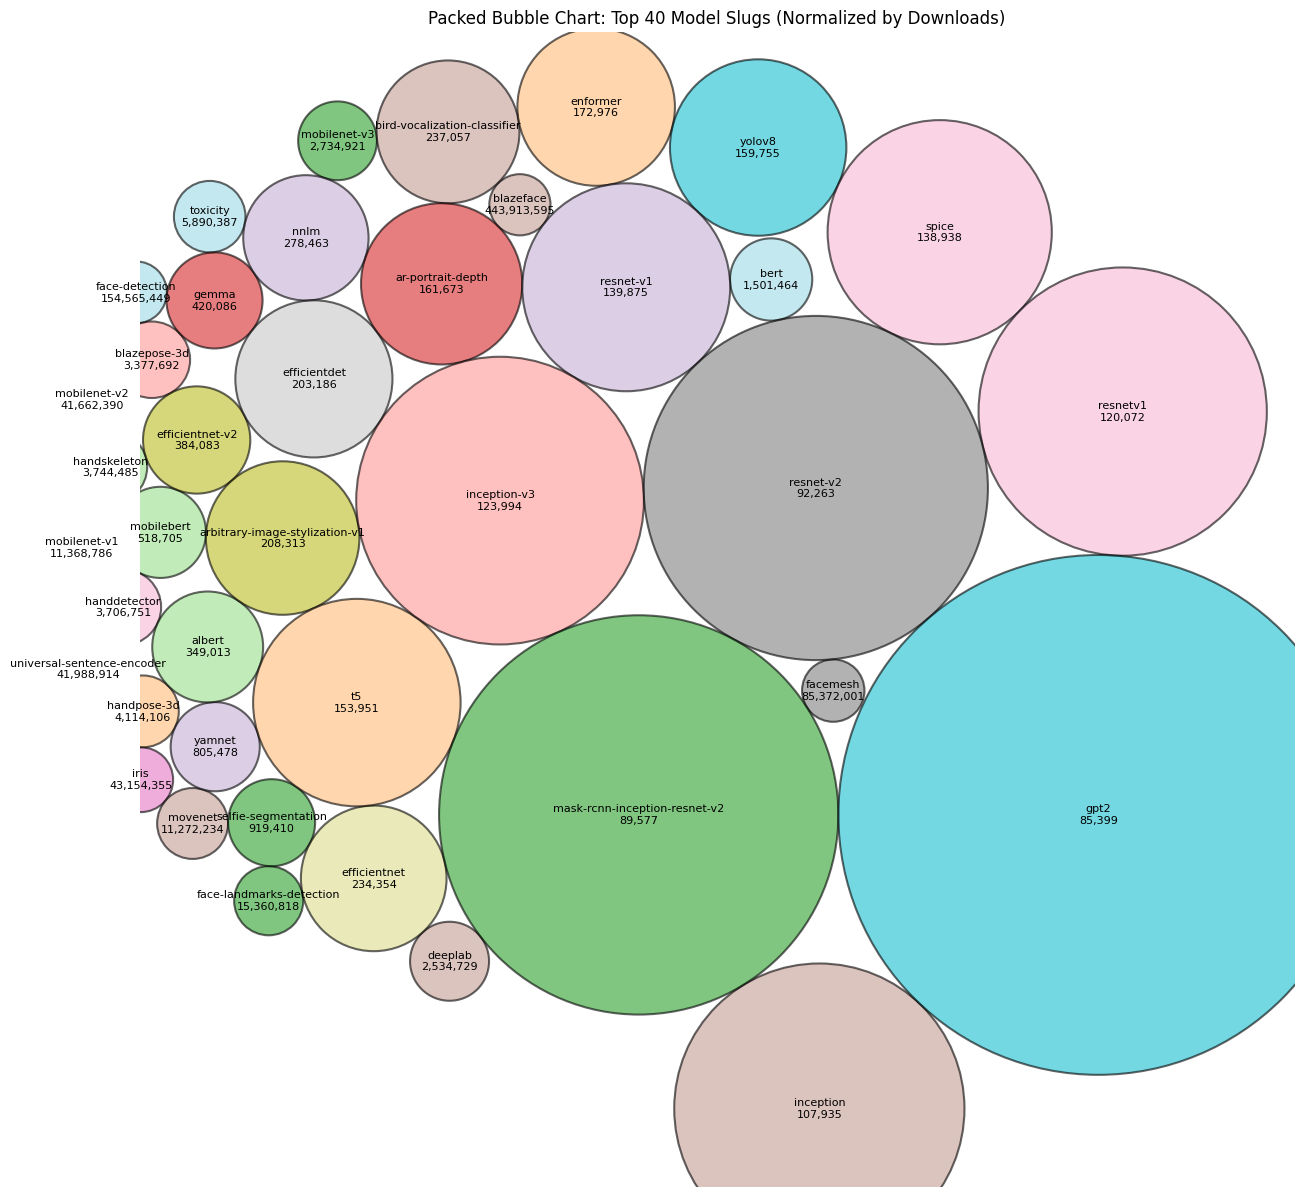

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import circlify
import random

# Assuming `slug_summary` already exists and has 'CurrentSlug', 'TotalDownloads', etc.
# Prepare top 40 models
top40_df = slug_summary.sort_values(by='TotalDownloads', ascending=False).head(40).copy()

# Normalize downloads (square root scaling to avoid extreme differences visually)
top40_df['NormDownloads'] = (top40_df['TotalDownloads'] / top40_df['TotalDownloads'].max()) ** 0.5 * 10

# Prepare data for circlify
data = [
    {'id': row['CurrentSlug'], 'datum': row['NormDownloads'], 'downloads': row['TotalDownloads']}
    for _, row in top40_df.iterrows()
]

# Generate circle packing
circles = circlify.circlify(
    data,
    show_enclosure=False,
    target_enclosure=circlify.Circle(x=0.5, y=0.5, r=0.6)
)

# Plot
fig, ax = plt.subplots(figsize=(15, 15))
ax.axis('off')
ax.set_aspect('equal')

colors = plt.cm.tab20.colors  # Color palette

# Draw circles
for circle, datum in zip(circles, data):
    x, y, r = circle.x, circle.y, circle.r
    color = random.choice(colors)
    ax.add_patch(plt.Circle((x, y), r, alpha=0.6, linewidth=1.5, edgecolor='black', facecolor=color))
    # Display slug and downloads as label
    label = f"{datum['id']}\n{int(datum['downloads']):,}"
    ax.text(x, y, label, ha='center', va='center', fontsize=8)

plt.title('Packed Bubble Chart: Top 40 Model Slugs (Normalized by Downloads)')
plt.show()

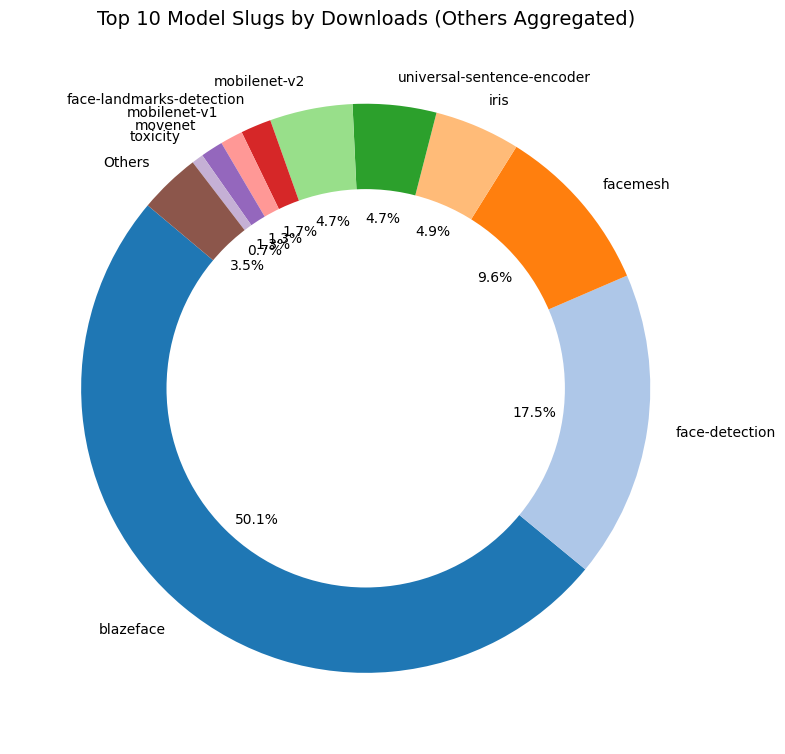

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named `slug_summary`
# Take top 10 by downloads
top10 = slug_summary.nlargest(10, 'TotalDownloads')

# Calculate "Others"
others_sum = slug_summary['TotalDownloads'].sum() - top10['TotalDownloads'].sum()

# Prepare labels and sizes
labels = top10['CurrentSlug'].tolist() + ['Others']
sizes = top10['TotalDownloads'].tolist() + [others_sum]

# Plot
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=140, 
    wedgeprops={'width': 0.4},  # Makes it a donut
    colors=plt.cm.tab20.colors
)

# Center circle for donut style
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Titles and aesthetics
ax.set_title('Top 10 Model Slugs by Downloads (Others Aggregated)', fontsize=14)
plt.tight_layout()
plt.show()

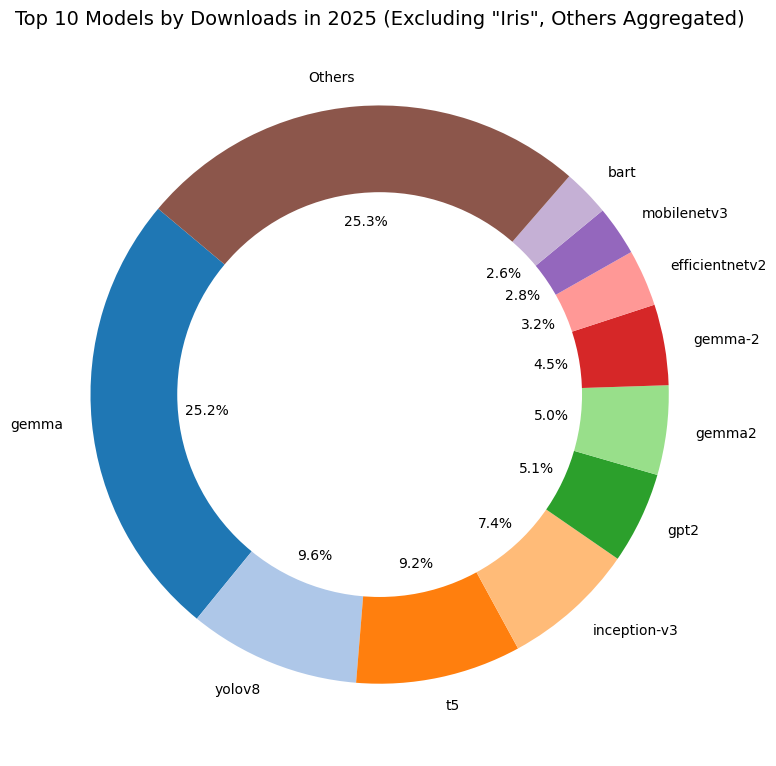

In [17]:
import matplotlib.pyplot as plt

# Filter models created in 2025 and exclude 'iris'
models_2025 = slug_summary[
    (pd.to_datetime(slug_summary['FirstCreationDate']).dt.year == 2025) &
    (~slug_summary['CurrentSlug'].str.contains('iris', case=False))
]

# Top 10 by downloads for 2025
top10_2025 = models_2025.nlargest(10, 'TotalDownloads')

# Calculate "Others"
others_sum_2025 = models_2025['TotalDownloads'].sum() - top10_2025['TotalDownloads'].sum()

# Labels and sizes
labels_2025 = top10_2025['CurrentSlug'].tolist() + ['Others']
sizes_2025 = top10_2025['TotalDownloads'].tolist() + [others_sum_2025]

# Plot donut chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    sizes_2025,
    labels=labels_2025,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'width': 0.4},
    colors=plt.cm.tab20.colors
)

# Donut center
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Title
ax.set_title('Top 10 Models by Downloads in 2025 (Excluding "Iris", Others Aggregated)', fontsize=14)
plt.tight_layout()
plt.show()

## 📊 2️⃣ Framework Popularity (from model_variations)

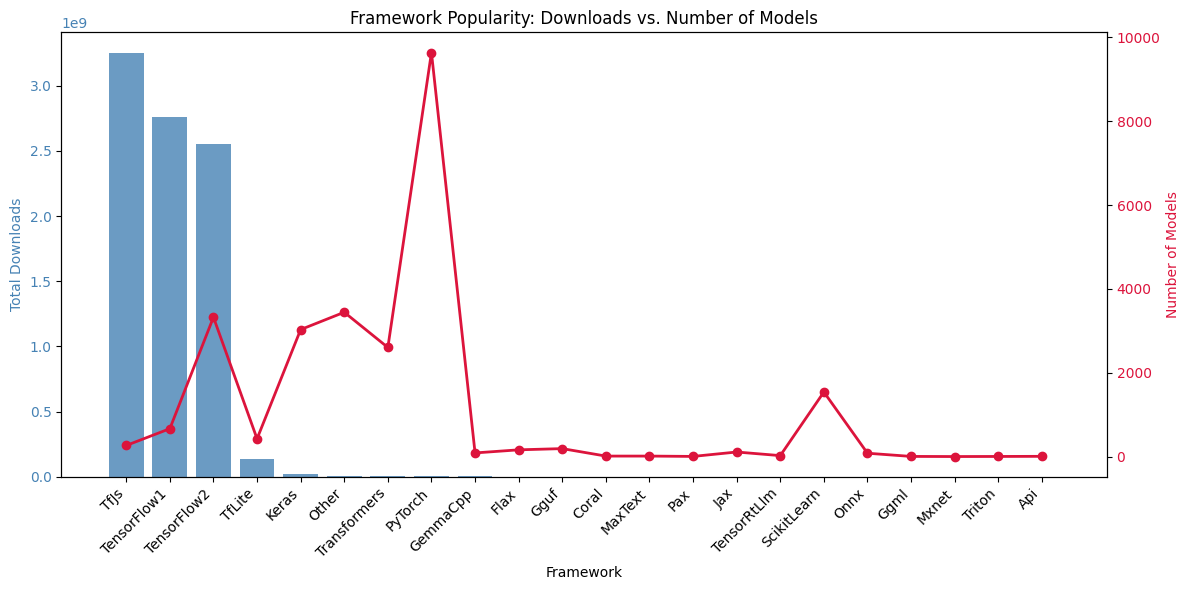

In [89]:
import matplotlib.pyplot as plt

# Aggregate Downloads and Count of Models
downloads_per_framework = framework_df.groupby('ModelFramework')['TotalDownloads'].sum().sort_values(ascending=False)
model_count_per_framework = framework_df['ModelFramework'].value_counts().reindex(downloads_per_framework.index)

# Create Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for Downloads (darker color)
bar_color = 'steelblue'
ax1.bar(downloads_per_framework.index, downloads_per_framework.values, color=bar_color, alpha=0.8)
ax1.set_xlabel('Framework')
ax1.set_ylabel('Total Downloads', color=bar_color)
ax1.tick_params(axis='y', labelcolor=bar_color)
plt.xticks(rotation=45, ha='right')

# Secondary axis for Model Counts
line_color = 'crimson'
ax2 = ax1.twinx()
ax2.plot(model_count_per_framework.index, model_count_per_framework.values, color=line_color, marker='o', linewidth=2)
ax2.set_ylabel('Number of Models', color=line_color)
ax2.tick_params(axis='y', labelcolor=line_color)

# Title
plt.title('Framework Popularity: Downloads vs. Number of Models')

plt.tight_layout()
plt.show()

## Fine-Tunability of Models on Kaggle

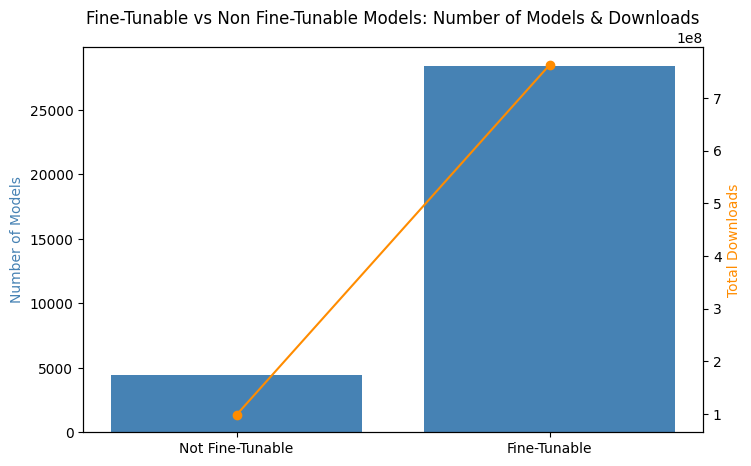

In [95]:
# Join models and model_variation_versions using ModelId / CurrentModelVersionId appropriately.
# Assuming 'ModelId' exists in model_variation_versions and 'Id' in models

fine_tune_df = model_variation_versions.merge(models, left_on='Id', right_on='Id', how='left')

# Now you have FineTunable and downloads/views from models together.
# Group by FineTunable
fine_tune_summary = fine_tune_df.groupby('FineTunable').agg({
    'TotalDownloads': 'sum',
    'TotalViews': 'sum',
    'Id': 'count'
}).rename(columns={'Id': 'Number of Models'}).reset_index()

# Plot
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.bar(['Not Fine-Tunable', 'Fine-Tunable'], fine_tune_summary['Number of Models'], color='steelblue')
ax1.set_ylabel('Number of Models', color='steelblue')
ax1.set_title('Fine-Tunable vs Non Fine-Tunable Models: Number of Models & Downloads')

ax2 = ax1.twinx()
ax2.plot(['Not Fine-Tunable', 'Fine-Tunable'], fine_tune_summary['TotalDownloads'], color='darkorange', marker='o')
ax2.set_ylabel('Total Downloads', color='darkorange')

plt.show()

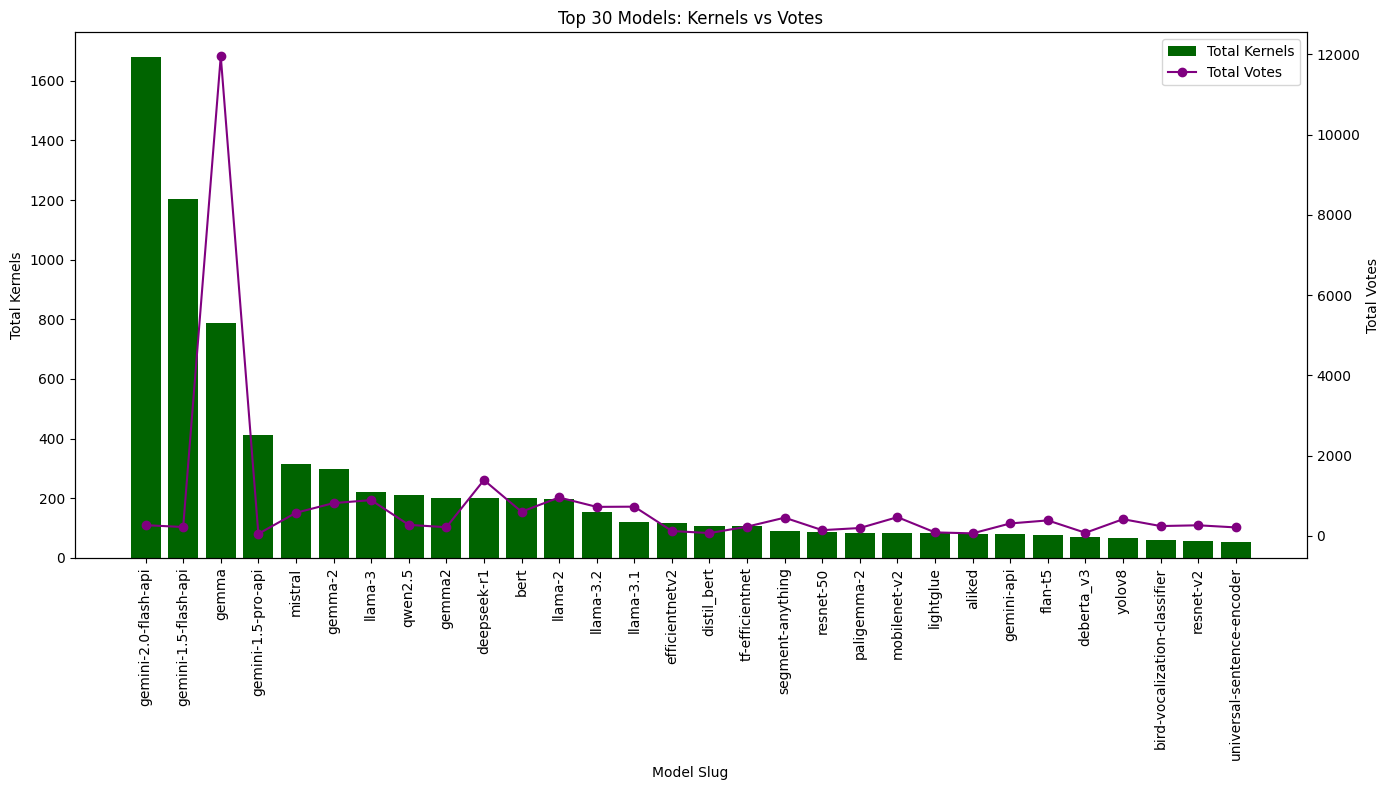

In [103]:
import matplotlib.pyplot as plt

# Sort and take top 30
kernels_summary = models.groupby('CurrentSlug').agg({
    'TotalKernels': 'sum',
    'TotalVotes': 'sum'
}).reset_index()
kernels_summary = kernels_summary.sort_values(by='TotalKernels', ascending=False).head(30)

fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar plot (vertical) for Kernels
bars = ax1.bar(kernels_summary['CurrentSlug'], kernels_summary['TotalKernels'], color='darkgreen', label='Total Kernels')
ax1.set_ylabel('Total Kernels')
ax1.set_xlabel('Model Slug')
ax1.set_title('Top 30 Models: Kernels vs Votes')
ax1.tick_params(axis='x', rotation=90)

# Line plot for Votes
ax2 = ax1.twinx()
ax2.plot(kernels_summary['CurrentSlug'], kernels_summary['TotalVotes'], 'o-', color='purple', label='Total Votes')
ax2.set_ylabel('Total Votes')

# Combine legends
lines, labels = [], []
for ax in [ax1, ax2]:
    line, label = ax.get_legend_handles_labels()
    lines.extend(line)
    labels.extend(label)
ax1.legend(lines, labels, loc='upper right')

plt.tight_layout()
plt.show()